In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=(11,6)
rcParams['axes.labelsize'] = 20
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize']=20

rcParams["font.family"] = "serif"
rcParams["font.serif"] = "STIX"
rcParams["mathtext.fontset"] = "stix"


In [2]:
#injected radius=11.86984

#Note: The radius accuracy represented as '10m' is actually closer to 20m. Since the combined radius 
#posterior goes flat after reaching ~15m accuracy, taking the value to 0.0008, which corresponds to 10m accuracy,
#gives a much worse number of years than quoted in literature

#Eg. Quoting arXiv:2211.01396 , "On the other hand we find that with one year of observation, Cosmic Explorer will measure R_{1.4} to
#better than 0.6% precision." (This is about 70 m for the EoS used to obtain this result)

radius_accuracy={'10m':0.0014,'50m':0.0042,'100m':0.0084}

network={'CE40+2A#':'radius_data_files/output_eos895_CE40_2Asharp',
         'CE40+CE20+A#':'radius_data_files/output_eos895_CE40_CE20_Asharp',
         '3A#' : 'radius_data_files/output_eos895_Asharp'
        }

#Total number of 'detected' events, needed to convert number of events to time
total_events={'CE40+2A#':3526,  #5 years at this sensitivity
              'CE40+CE20+A#': 2406 ,  #3 years at this sensitivity
              '3A#' : 2861     #100 years at this sensitivity
               } 

total_years={'CE40+2A#':5,  
              'CE40+CE20+A#': 3 ,  
              '3A#' : 250 
               } 

## Plotting Histogram for number of years to reach radius accuracy of 10 m

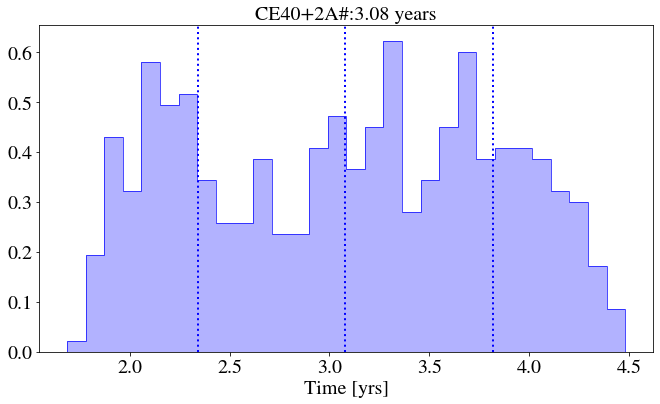

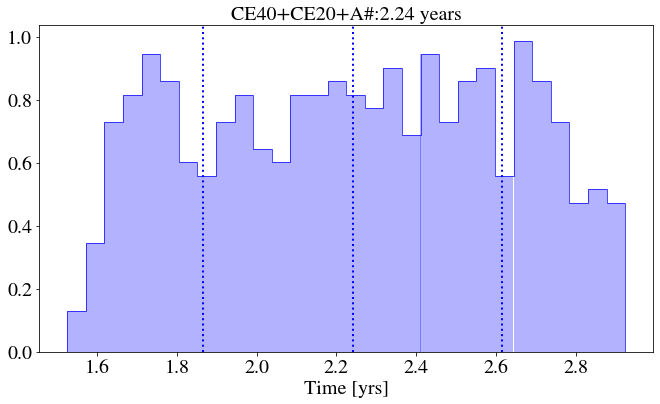

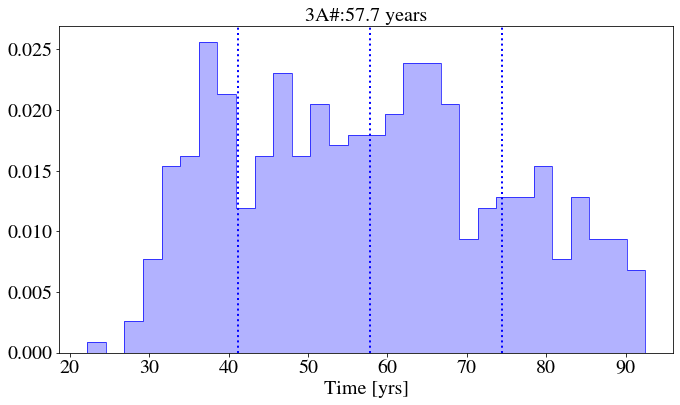

In [3]:
frac_error=radius_accuracy['10m']
for keys,value in network.items():
    detector=keys
    filepath=value
    listfiles=glob.glob('{}/nevents_*.txt'.format(filepath))
    if(len(listfiles)==0):
        break
    number_of_events=[]
    for file in listfiles:
        events,err=np.loadtxt(file,unpack=True)
        for i in range(len(events)):
            if (err[i]<frac_error):
                number_of_events.append(events[i])
                break
    tot_events=float(total_events[keys])
    years=float(total_years[keys])
    number_of_events=np.array(number_of_events)
    time=(years/tot_events)*number_of_events
    mean=np.mean(time)
    stdev=np.std(time)
    plt.hist(time,bins=30,density=True,alpha=0.3,color='blue')
    plt.hist(time,histtype='step',density=True,bins=30,alpha=0.7,color='blue')
    plt.axvline(mean,linestyle=':',linewidth=2,color='blue')
    plt.axvline(mean+stdev,linestyle=':',linewidth=2,color='blue')
    plt.axvline(mean-stdev,linestyle=':',linewidth=2,color='blue')
    plt.xlabel("Time [yrs]")
    plt.title(str(keys)+":"+str(mean)[0:4]+" years")
    plt.show()
    

